<a href="https://colab.research.google.com/github/upskilleralok07/aloksharma1/blob/main/linearregression01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


EDA


In [5]:
df.shape


(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

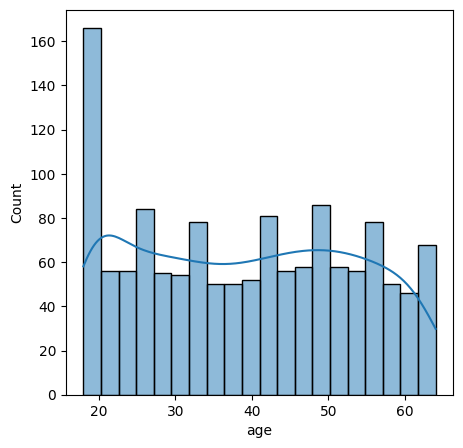

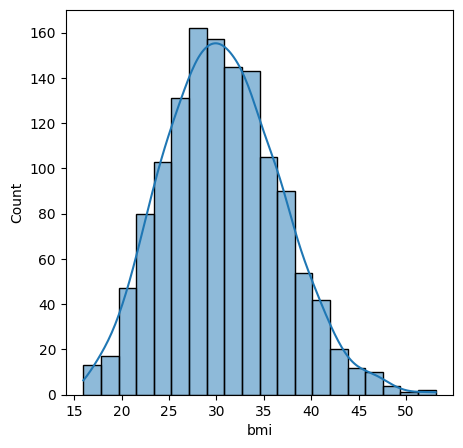

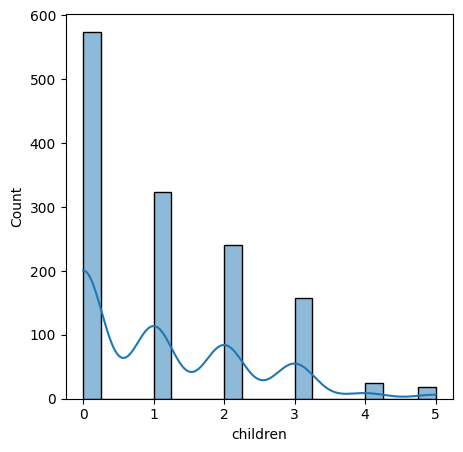

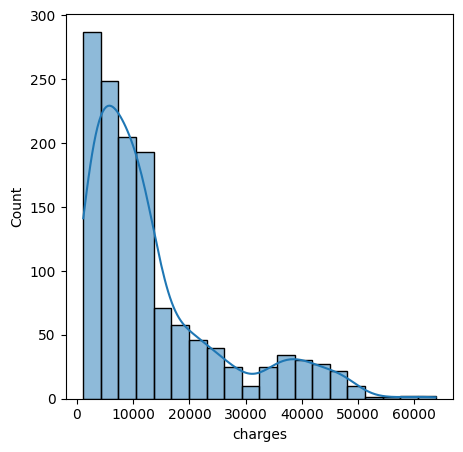

In [11]:
numeric_columns = ['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
  plt.figure(figsize=(5,5))
  sns.histplot(df[col],kde=True,bins=20)
  plt.show()

<Axes: xlabel='children', ylabel='count'>

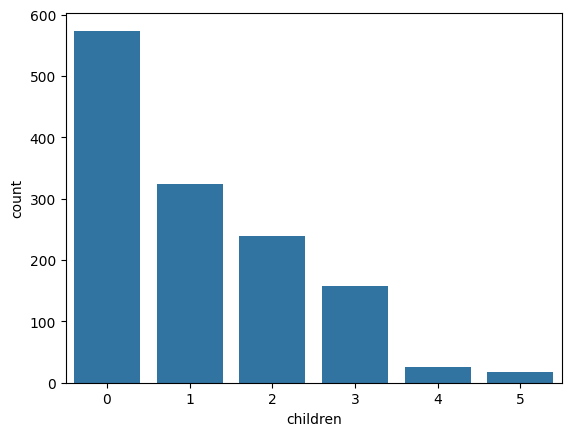

In [12]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

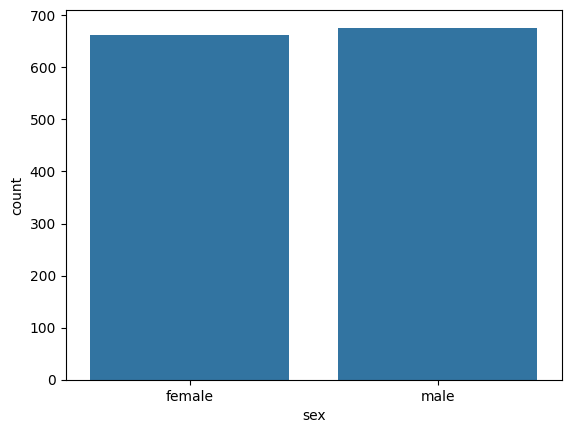

In [13]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

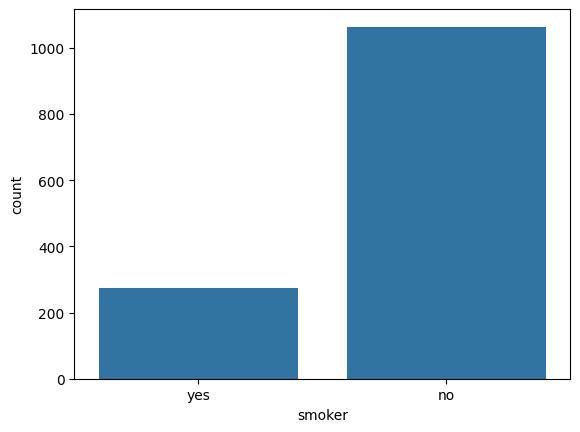

In [14]:
sns.countplot(x=df['smoker'])


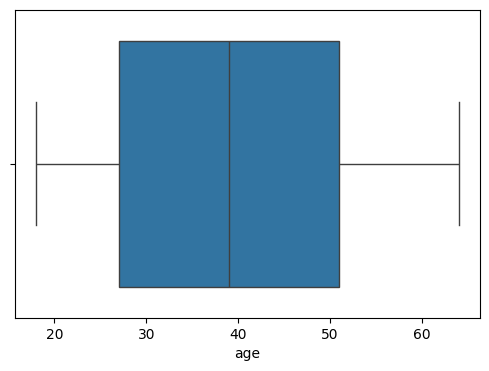

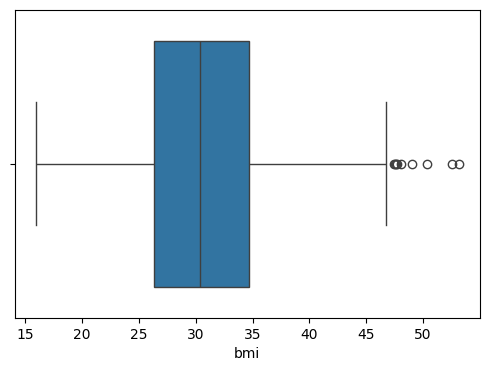

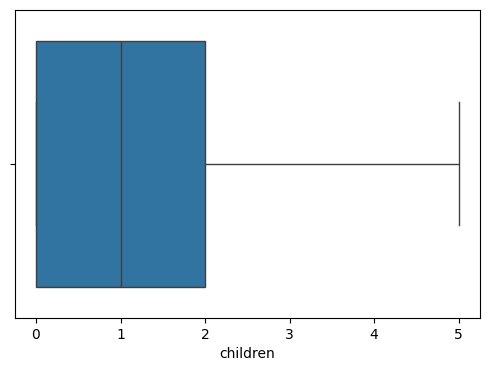

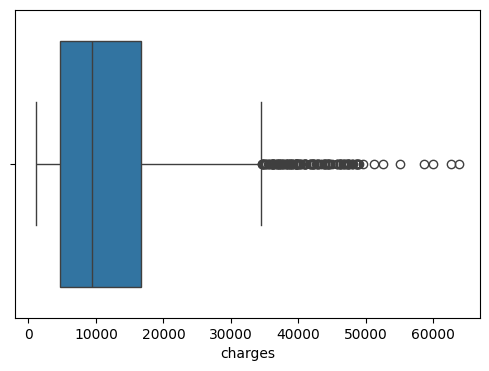

In [15]:
for col in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])
  plt.show()

<Axes: >

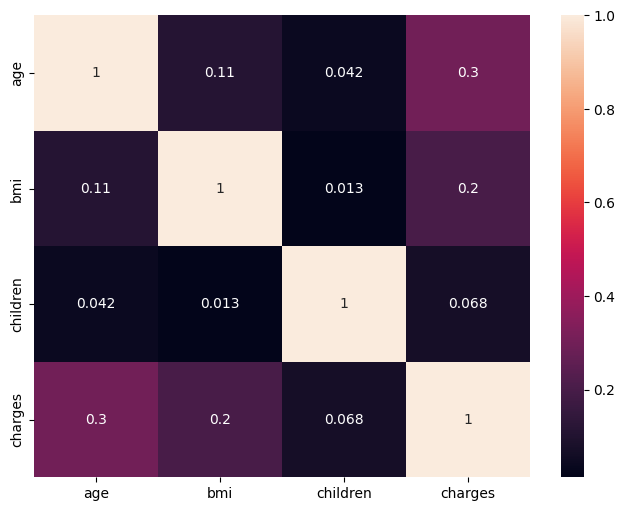

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

DATA CLEANING


In [17]:
df_cleaned=df.copy()
df_cleaned.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df_cleaned.drop_duplicates(inplace=True)

In [19]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [20]:
df_cleaned['sex'].value_counts()

,count
sex,
male,675
female,662


In [21]:
df_cleaned['sex']=df_cleaned['sex'].map({'female':0,'male':1})

In [22]:
df_cleaned['smoker']=df_cleaned['smoker'].map({'no':0,'yes':1})

In [23]:
df_cleaned.rename(columns={'sex':'is_female',
'smoker':'is_smoker'},inplace=True)

In [24]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [25]:
df_cleaned = df.copy() # Re-copy the original DataFrame
df_cleaned['sex']=df_cleaned['sex'].map({'female':0,'male':1})
df_cleaned['smoker']=df_cleaned['smoker'].map({'no':0,'yes':1})
df_cleaned.rename(columns={'sex':'is_female', 'smoker':'is_smoker'}, inplace=True)
df_cleaned = pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)

In [26]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [27]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [28]:
bool_cols = df_cleaned.select_dtypes(include='bool').columns
df_cleaned[bool_cols] = df_cleaned[bool_cols].astype(int)

In [29]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


FEATURE ENGINEERING AND EXTRACTION


<Axes: xlabel='bmi', ylabel='Count'>

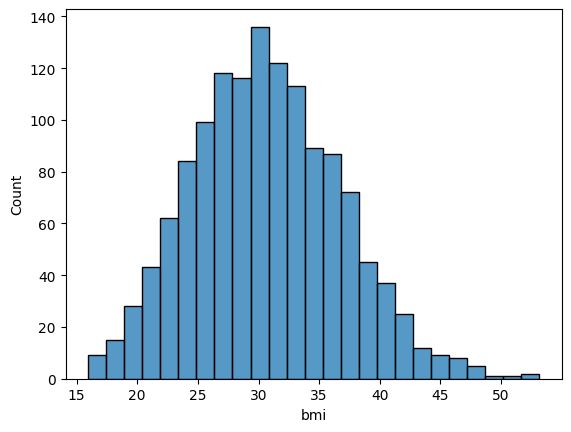

In [30]:
sns.histplot(df['bmi'])

In [31]:
df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                                     labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [32]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,0,27.900,0,1,16884.92400,0,0,1,Overweight
1,18,1,33.770,1,0,1725.55230,0,1,0,Obese
2,28,1,33.000,3,0,4449.46200,0,1,0,Obese
3,33,1,22.705,0,0,21984.47061,1,0,0,Normal
4,32,1,28.880,0,0,3866.85520,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0,Obese
1334,18,0,31.920,0,0,2205.98080,0,0,0,Obese
1335,18,0,36.850,0,0,1629.83350,0,1,0,Obese
1336,21,0,25.800,0,0,2007.94500,0,0,1,Overweight


In [33]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)

In [34]:
df_cleaned=df_cleaned.astype(int)

In [35]:
df_cleaned.head()


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,0,27,0,1,16884,0,0,1,0,1,0
1,18,1,33,1,0,1725,0,1,0,0,0,1
2,28,1,33,3,0,4449,0,1,0,0,0,1
3,33,1,22,0,0,21984,1,0,0,1,0,0
4,32,1,28,0,0,3866,1,0,0,0,1,0


In [36]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [37]:
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children']
scaler = StandardScaler()
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

In [38]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.438764,0,-0.518122,-0.908614,1,16884,0,0,1,0,1,0
1,-1.509965,1,0.462657,-0.078767,0,1725,0,1,0,0,0,1
2,-0.797954,1,0.462657,1.580926,0,4449,0,1,0,0,0,1
3,-0.441948,1,-1.335438,-0.908614,0,21984,1,0,0,1,0,0
4,-0.513149,1,-0.354659,-0.908614,0,3866,1,0,0,0,1,0


Pearson Correlation with 'charges':

charges                    1.000000
bmi_category_Normal        0.753657
is_smoker                  0.438666
region_southwest           0.438666
region_northwest           0.317039
age                        0.209867
bmi_category_Overweight    0.059849
is_female                 -0.438666
children                  -0.509581
region_southeast          -0.675208
bmi_category_Obese        -0.675208
bmi                       -0.881346
Name: charges, dtype: float64


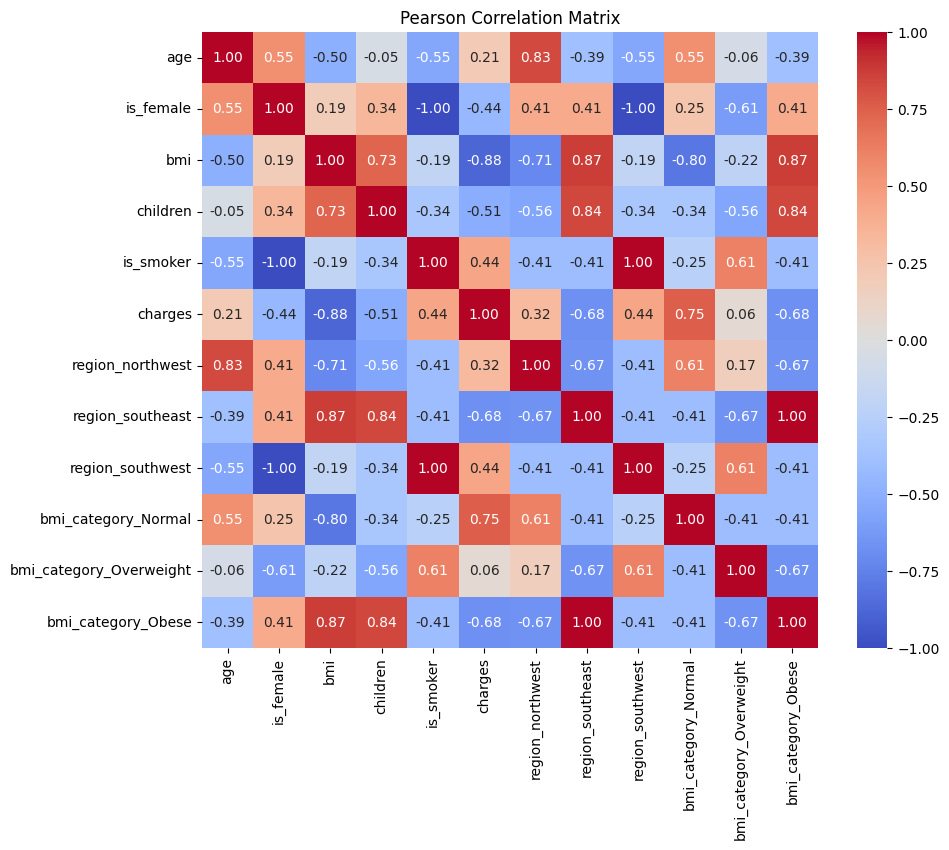

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation (replace with your full dataset)
data = {
    'age': [-1.438764, -1.509965, -0.797954, -0.441948, -0.513149],
    'is_female': [0, 1, 1, 1, 1],
    'bmi': [-0.518122, 0.462657, 0.462657, -1.335438, -0.354659],
    'children': [-0.908614, -0.078767, 1.580926, -0.908614, -0.908614],
    'is_smoker': [1, 0, 0, 0, 0],
    'charges': [16884, 1725, 4449, 21984, 3866],
    'region_northwest': [0, 0, 0, 1, 1],
    'region_southeast': [0, 1, 1, 0, 0],
    'region_southwest': [1, 0, 0, 0, 0],
    'bmi_category_Normal': [0, 0, 0, 1, 0],
    'bmi_category_Overweight': [1, 0, 0, 0, 1],
    'bmi_category_Obese': [0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)

# ---- Pearson Correlation ---- #
correlation_matrix = df.corr(method='pearson')

# Print correlation of each feature with 'charges'
print("Pearson Correlation with 'charges':\n")
print(correlation_matrix['charges'].sort_values(ascending=False))

# ---- Optional: Heatmap Visualization ---- #
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Pearson Correlation Matrix")
plt.show()


In [40]:
import pandas as pd
from scipy.stats import pearsonr

# Load your cleaned dataframe
# Example: df_cleaned = pd.read_csv('yourfile.csv')

# -------------------------------
# Pearson Correlation Calculation
# -------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

# Calculate Pearson correlations
correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}

# Convert to DataFrame for display
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])

# Optional: Sort by absolute correlation
correlation_df['Abs Correlation'] = correlation_df['Pearson Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Abs Correlation', ascending=False).drop(columns='Abs Correlation')

# Display result
print(correlation_df)



                    Feature  Pearson Correlation
4                 is_smoker             0.787251
0                       age             0.299009
10       bmi_category_Obese             0.196858
1                       bmi             0.196188
9   bmi_category_Overweight            -0.117769
8       bmi_category_Normal            -0.105292
6          region_southeast             0.073981
2                  children             0.067999
3                 is_female             0.057293
7          region_southwest            -0.043210
5          region_northwest            -0.039905


In [41]:
import pandas as pd
from scipy.stats import chi2_contingency

# Suppose df_cleaned is your preprocessed DataFrame
# You must bin 'charges' into categories to make it suitable for chi-square

# Step 1: Bin 'charges' into categories
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=3, labels=['Low', 'Medium', 'High'])

# Step 2: Select categorical features (example ones)
categorical_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

# Step 3: Chi-square test for each categorical feature
chi_square_results = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df_cleaned[feature], df_cleaned['charges_bin'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append({
        'Feature': feature,
        'Chi2 Statistic': chi2,
        'p-value': p
    })

# Step 4: Create a DataFrame of results
chi_square_df = pd.DataFrame(chi_square_results)

# Step 5: Display
print(chi_square_df.sort_values(by='p-value'))



                   Feature  Chi2 Statistic        p-value
1                is_smoker      689.120301  2.287852e-150
3         region_southeast        7.298813   2.600656e-02
4         region_southwest        5.714110   5.743765e-02
7       bmi_category_Obese        3.791509   1.502050e-01
5      bmi_category_Normal        3.002759   2.228226e-01
6  bmi_category_Overweight        2.697758   2.595310e-01
0                is_female        1.979290   3.717086e-01
2         region_northwest        1.617508   4.454128e-01


In [42]:
import pandas as pd
from scipy.stats import chi2_contingency

# Suppose df_cleaned is your preprocessed DataFrame
# You must bin 'charges' into categories to make it suitable for chi-square

# Step 1: Bin 'charges' into categories
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=3, labels=['Low', 'Medium', 'High'])

# Step 2: Select categorical features (example ones)
categorical_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

# Step 3: Chi-square test for each categorical feature
chi_square_results = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df_cleaned[feature], df_cleaned['charges_bin'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append({
        'Feature': feature,
        'Chi2 Statistic': chi2,
        'p-value': p
    })

# Step 4: Create a DataFrame of results
chi_square_df = pd.DataFrame(chi_square_results)

# Step 5: Display
print(chi_square_df.sort_values(by='p-value'))


                   Feature  Chi2 Statistic        p-value
1                is_smoker      689.120301  2.287852e-150
3         region_southeast        7.298813   2.600656e-02
4         region_southwest        5.714110   5.743765e-02
7       bmi_category_Obese        3.791509   1.502050e-01
5      bmi_category_Normal        3.002759   2.228226e-01
6  bmi_category_Overweight        2.697758   2.595310e-01
0                is_female        1.979290   3.717086e-01
2         region_northwest        1.617508   4.454128e-01


In [43]:
import pandas as pd
from scipy.stats import chi2_contingency

# Significance level
alpha = 0.05

# Step 1: Bin charges into 4 quantiles (can change to 3 if needed)
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)

# Step 2: Categorical features list
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

# Step 3: Chi-Square test and decision logic
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)

    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'

    chi2_results[col] = {
        'chi2_statistic': round(chi2_stat, 4),
        'p_value': round(p_val, 6),
        'Decision': decision
    }

# Step 4: Convert results to DataFrame and sort
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')

# Step 5: Show the result
chi2_df


,chi2_statistic,p_value,Decision
is_smoker,854.0203,0.0,Reject Null (Keep Feature)
region_southeast,15.2088,0.001647,Reject Null (Keep Feature)
is_female,9.5321,0.022992,Reject Null (Keep Feature)
bmi_category_Obese,7.6198,0.054558,Accept Null (Drop Feature)
region_southwest,5.5308,0.136807,Accept Null (Drop Feature)
bmi_category_Overweight,4.6277,0.201181,Accept Null (Drop Feature)
bmi_category_Normal,4.1349,0.24726,Accept Null (Drop Feature)
region_northwest,1.2261,0.746749,Accept Null (Drop Feature)


In [44]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges', 'region_southeast', 'bmi_category_Obese']]


In [45]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.438764,0,-0.518122,-0.908614,1,16884,0,0
1,-1.509965,1,0.462657,-0.078767,0,1725,1,1
2,-0.797954,1,0.462657,1.580926,0,4449,1,1
3,-0.441948,1,-1.335438,-0.908614,0,21984,0,0
4,-0.513149,1,-0.354659,-0.908614,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.768473,1,-0.027733,1.580926,0,10600,0,1
1334,-1.509965,0,0.135731,-0.908614,0,2205,0,1
1335,-1.509965,0,0.953046,-0.908614,0,1629,1,1
1336,-1.296362,0,-0.845048,-0.908614,0,2007,0,0


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x=final_df.drop('charges',axis=1)
y=final_df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [49]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred=model.predict(x_test)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2
n=x_test.shape[0]
p=x_test.shape[1]
adj_r2=1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.778749318202314